# Imports and utility variables

In [4]:
import phoebe
from phoebe import u, c

import matplotlib.pyplot as plt

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
import analisis.phoebe_model.sampling.mcmc_utils as mcmc_utils
importlib.reload(gen_utils)
importlib.reload(mcmc_utils)

import emcee

logger = phoebe.logger(clevel='WARNING')

In [5]:
gaiaDatasets = ['lcGaiaG', 'lcGaiaRP', 'lcGaiaBP']
iturbideDatasets = ['lcIturbideAviles', 'lcIturbideFull']
ztfDatasets = ['lcZtfG', 'lcZtfR']
trimmedZtfDatasets = ['lcZtfGTrimmed', 'lcZtfRTrimmed']
allDatasets = gaiaDatasets + iturbideDatasets + ztfDatasets
plotAllDatasetsGroups = [['lcIturbideAviles'], ['lcIturbideFull'], gaiaDatasets, ztfDatasets]

# Load previous sampled bundle

Includes **many** MCMC iterations for ZTF trimmed data.

In [6]:
b = gen_utils.loadBundle("original-mcmc-trimmed-ztf")

Parameter: niters@mcmc_ztf_trimmed_round9_solution@solution
                       Qualifier: niters
                     Description: Completed number of iterations
                           Value: 4142
                  Constrained by: 
                      Constrains: None
                      Related to: None

Parameter: adopt_distributions@mcmc_ztf_trimmed_round9_solution@solution
                       Qualifier: adopt_distributions
                     Description: whether to create a distribution (of all parameters in adopt_parameters according to distributions_convert) when calling adopt_solution.
                           Value: True
                  Constrained by: 
                      Constrains: None
                      Related to: None

Parameter: distributions_convert@mcmc_ztf_trimmed_round9_solution@solution
                       Qualifier: distributions_convert
                     Description: type of distribution to use when calling adopt_solution, get_dist

(None, <Figure size 1390x1390 with 36 Axes>)

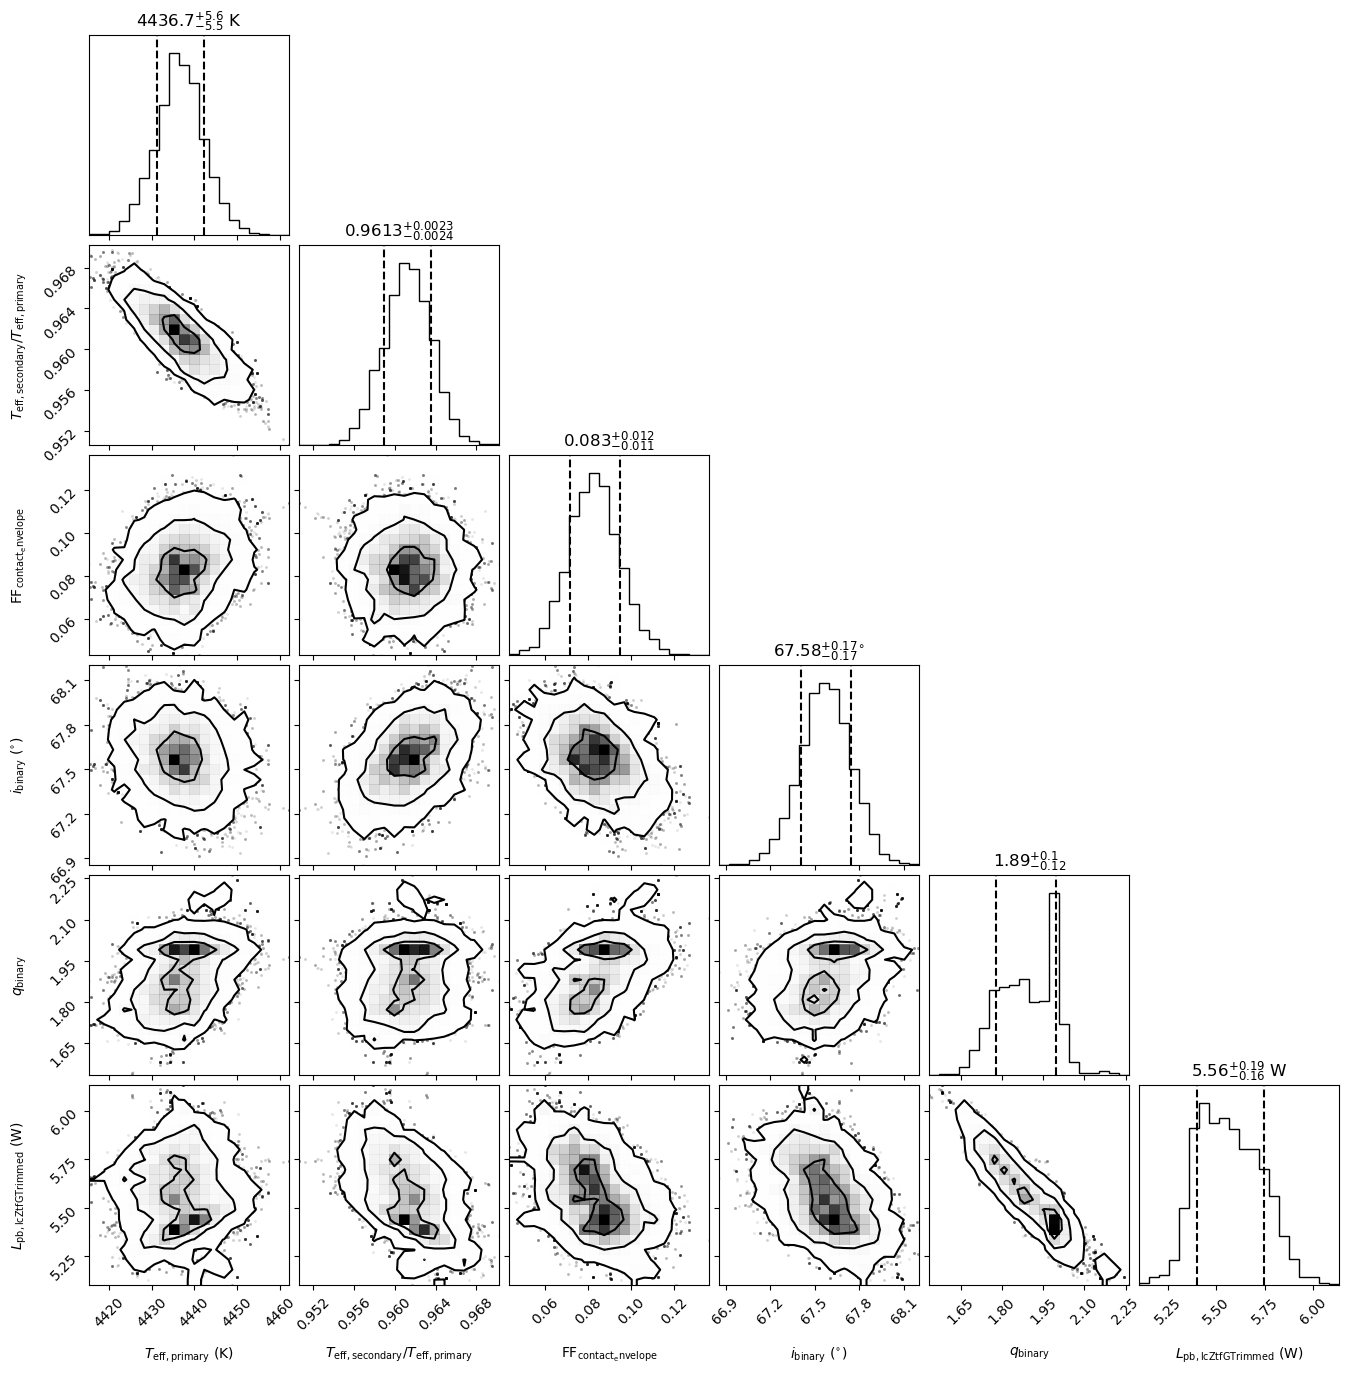

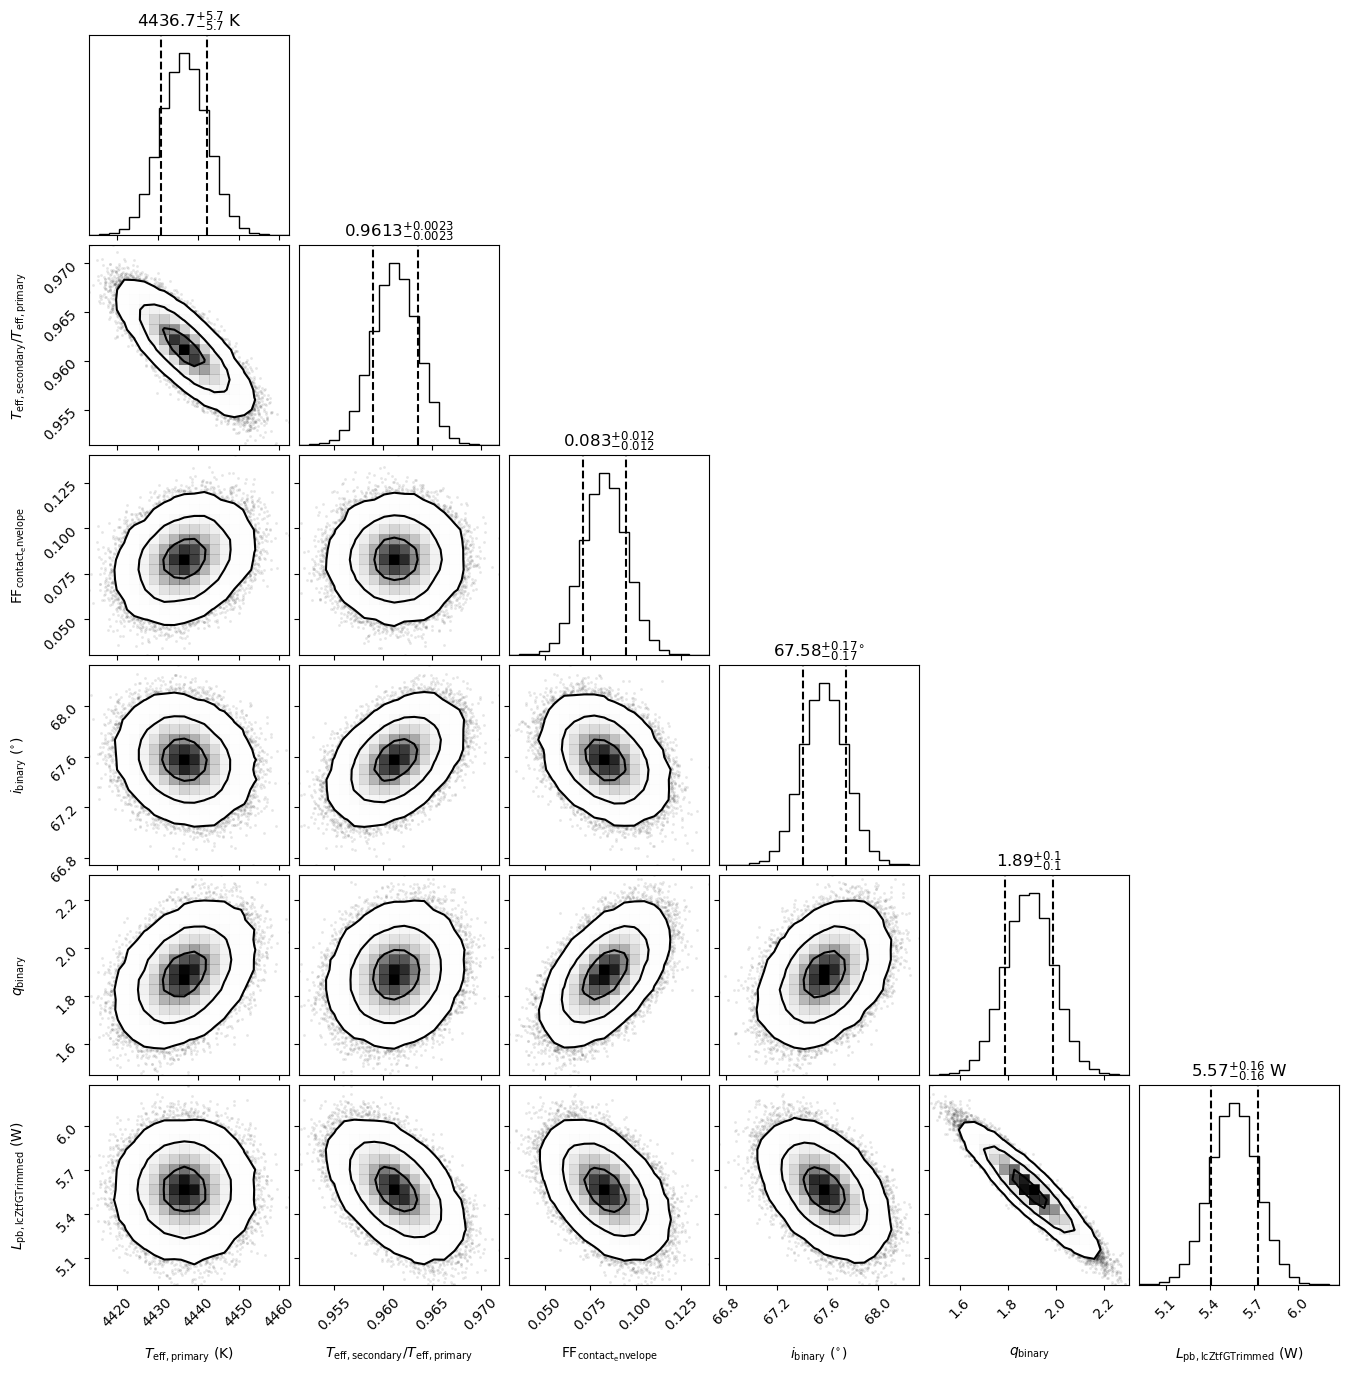

In [7]:
print(b['mcmc_ztf_trimmed_round9_solution@niters'])
print(b['mcmc_ztf_trimmed_round9_solution@adopt_distributions'])
print(b['mcmc_ztf_trimmed_round9_solution@distributions_convert'])
b.plot(solution='mcmc_ztf_trimmed_round9_solution', style='corner', lnprob_cutoff=-1550, show=True)
b.plot(solution='mcmc_ztf_trimmed_round9_solution', style='corner', lnprob_cutoff=-1550, show=True, distributions_convert='mvgaussian')

# Adopt sampled distribution

Will be used as prior for much larger sampling using Pezch server (will try 128 walkers, since it seems to be able to run 2 per core).

In [11]:
b.adopt_solution(solution='mcmc_ztf_trimmed_round9_solution', distribution='mcmc_sampled_priors', distribution_overwrite_all=True, lnprob_cutoff=-1550)
# b.adopt_solution(solution='mcmc_ztf_trimmed_round9_solution', distribution='mcmc_sampled_priors', distribution_overwrite_all=True, distributions_convert='mvgaussian')

b.distributions

['poro_porb_bounds',
 'bounds_around',
 'bounds_porb',
 'bounds_secondary_spot',
 'bounds_pblum_gaia_g',
 'bounds_pblum_ztf_g',
 'bounds_pblum_ztf_g_trimmed',
 'mcmc_sampled_priors']

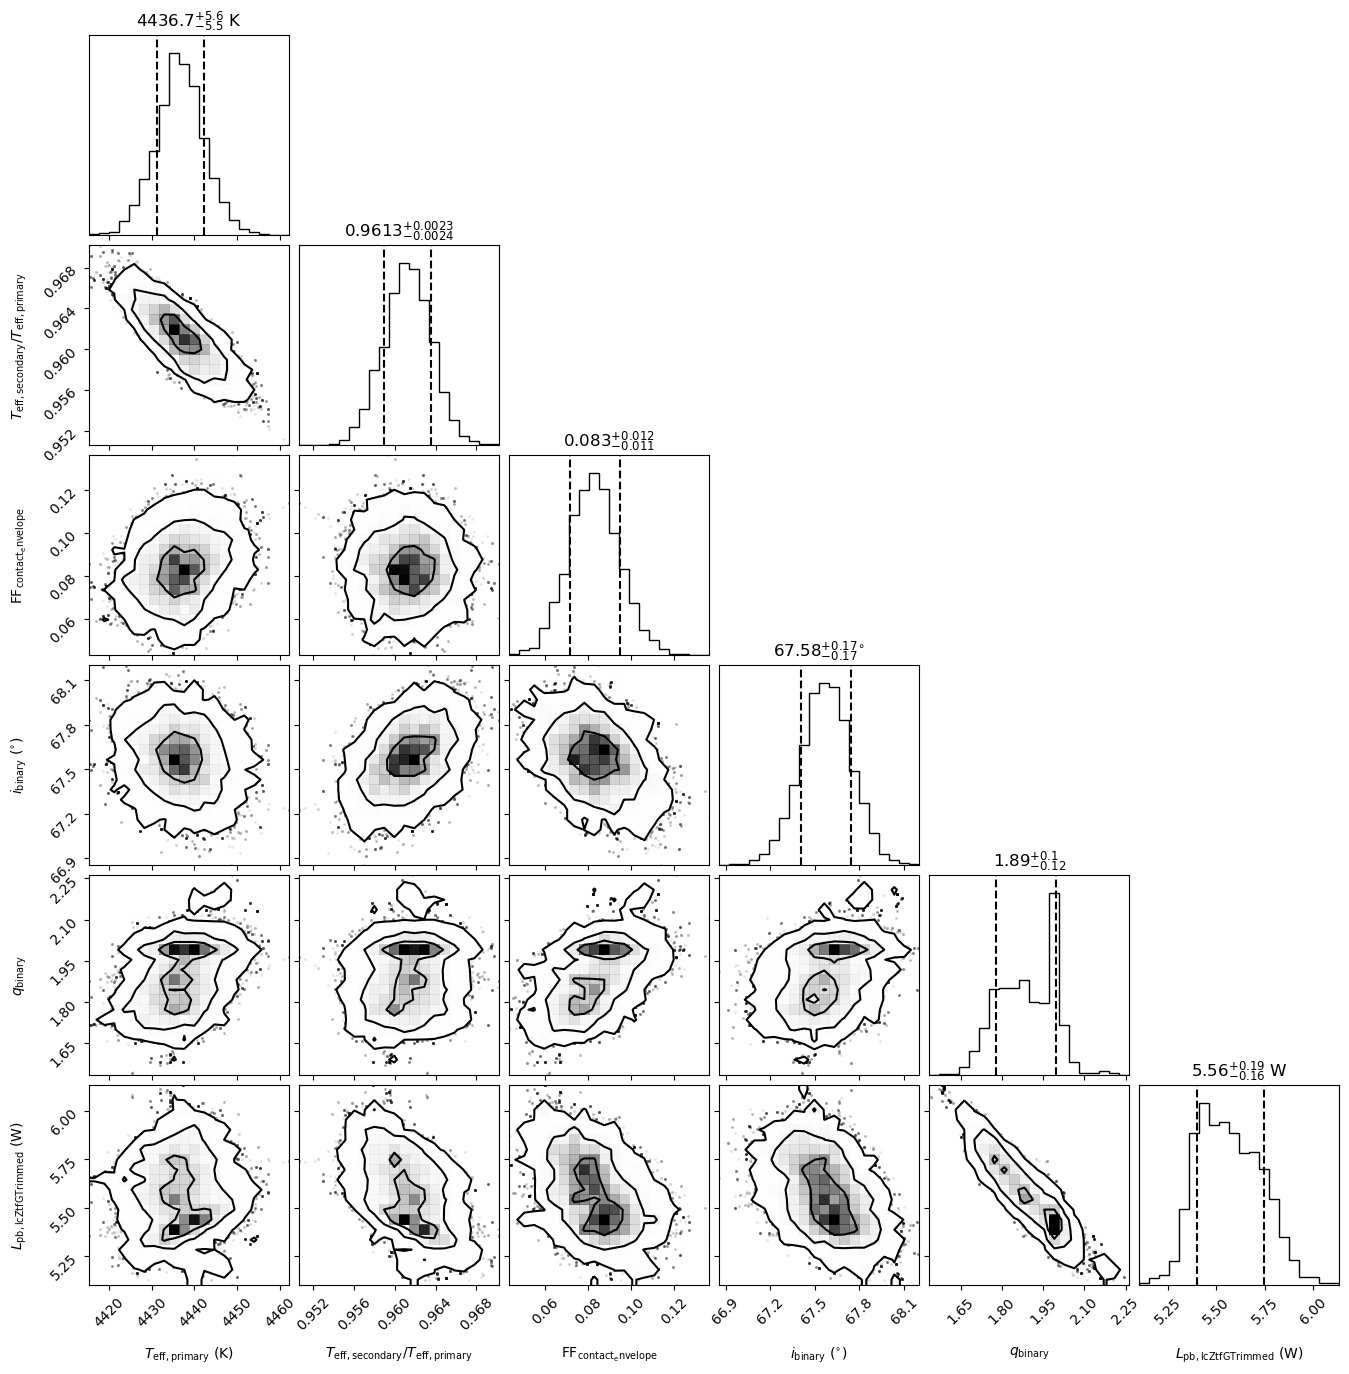

In [12]:
_ = b.plot_distribution_collection(distribution='mcmc_sampled_priors', show=True)

In [14]:
# lowered from 128 due to lack of RAM
# mcmc_utils.exportSampler(b, sampler_solver='updated_priors_mcmc', datasets=trimmedZtfDatasets, init_from=['mcmc_sampled_priors'], nwalkers=100, niters=100, progress_every_niters=10)

# running on personal laptop for now; lowering number of walkers to avoid over-stressing it
mcmc_utils.exportSampler(b, sampler_solver='updated_priors_mcmc', datasets=trimmedZtfDatasets, init_from=['mcmc_sampled_priors'], nwalkers=80, niters=100, progress_every_niters=10)

updated_priors_mcmc | external-jobs/updated_priors_mcmc.ecpy | results/updated_priors_mcmc
